In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from pprint import pprint

%matplotlib inline

In [26]:
full_data = pd.read_csv("datasets/wine/wine_train_7.csv")
#full_data = pd.read_csv("datasets/wine/wine_test_7.csv")
target = full_data[["Cultivator"]]
atributes = full_data.drop("Cultivator", axis=1) # drop labels for training set
full_data.head()

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,3,13.11,1.90,2.75,25.5,116,2.20,1.28,0.26,1.56,7.10,0.61,1.33,425
1,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520
2,2,12.17,1.45,2.53,19.0,104,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355
3,2,12.77,3.43,1.98,16.0,80,1.63,1.25,0.43,0.83,3.40,0.70,2.12,372
4,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740


In [27]:
target.head()

,Cultivator
0,3
1,2
2,2
3,2
4,3


In [28]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(categories='auto')
target_hot = cat_encoder.fit_transform(target).toarray()

In [29]:
#target = np.array(full_data["Cultivator"].copy(),dtype=int)
target = np.array(target["Cultivator"],dtype=int)
pprint(target)

array([3, 2, 2, 2, 3, 2, 3, 1, 1, 2, 2, 2, 2, 3, 1, 3, 1, 2, 1, 1, 2, 2,
       3, 1, 2, 1, 1, 2, 2, 3, 2, 1, 1, 3, 2, 2, 1, 3, 2, 2, 1, 3, 1, 3,
       2, 1, 3, 3, 2, 3, 1, 2, 2, 1, 3, 1, 1, 3, 2, 3, 1, 3, 2, 1, 3, 3,
       1, 2, 3, 2, 2, 1, 3, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2,
       3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1,
       1, 2, 3, 2, 2, 1, 2, 2, 2, 3, 1, 1, 1, 3, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 1, 3, 2, 1, 2, 1, 3])


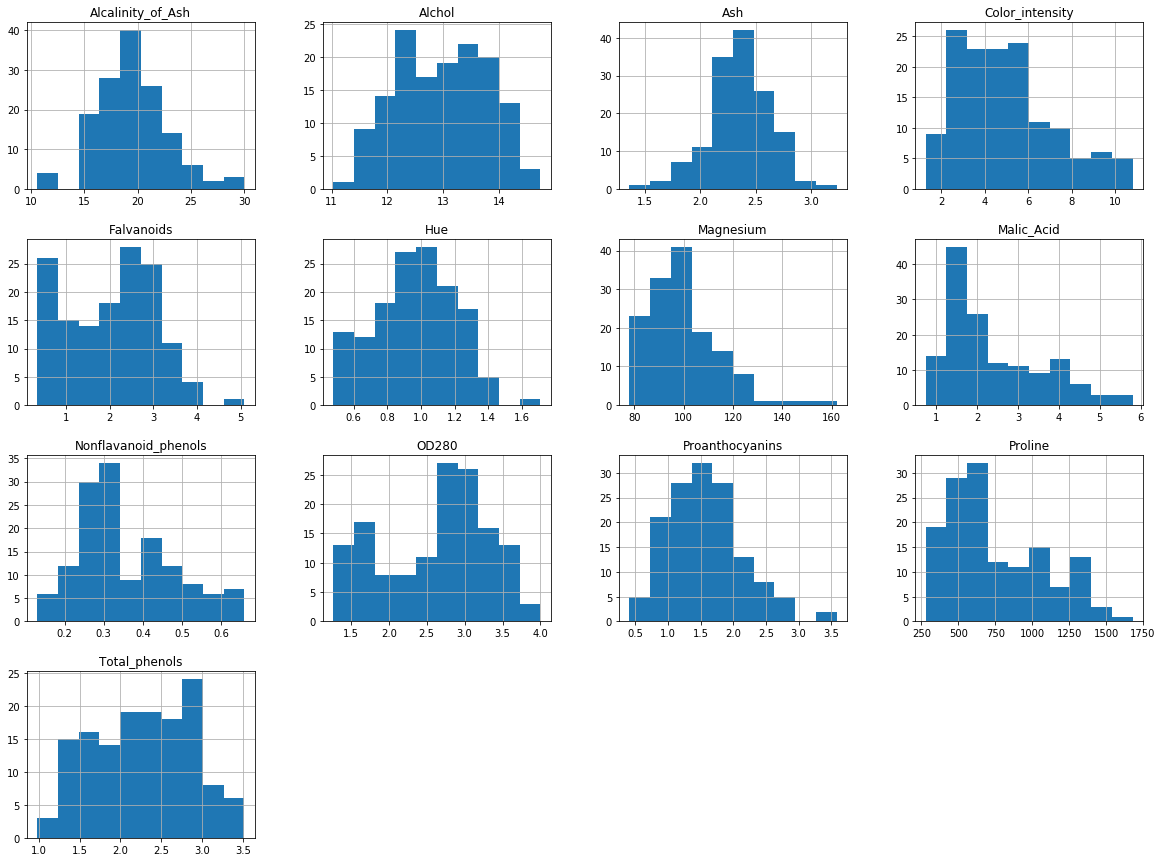

In [30]:
atributes.hist(bins=10, figsize=(20,15))
plt.show()

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

attribs_labels = list(atributes)
pprint(attribs_labels)

# Replace any missing values with the median value
# Nomalize all the data

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('nomalize', MinMaxScaler()),
    ])


full_pipeline = ColumnTransformer([
        ("num", num_pipeline, attribs_labels),
#        ("cat", OneHotEncoder(), cat_attribs),
    ])



['Alchol',
 'Malic_Acid',
 'Ash',
 'Alcalinity_of_Ash',
 'Magnesium',
 'Total_phenols',
 'Falvanoids',
 'Nonflavanoid_phenols',
 'Proanthocyanins',
 'Color_intensity',
 'Hue',
 'OD280',
 'Proline']


In [32]:
attribs = full_pipeline.fit_transform(atributes)

In [33]:
attribs

array([[0.55913978, 0.22924901, 0.74331551, ..., 0.10569106, 0.02197802,
        0.10485021],
       [0.36021505, 0.03952569, 0.        , ..., 0.46341463, 0.2014652 ,
        0.17261056],
       [0.30645161, 0.14031621, 0.62566845, ..., 0.78861789, 0.35164835,
        0.05492154],
       ...,
       [0.16935484, 0.22529644, 0.29946524, ..., 0.6097561 , 0.31868132,
        0.10699001],
       [0.75268817, 0.1798419 , 0.6631016 , ..., 0.61788618, 0.76923077,
        0.70399429],
       [0.76612903, 0.84980237, 0.46524064, ..., 0.08130081, 0.02197802,
        0.09771755]])

In [34]:
dataset = {"attribs_labels":attribs_labels,"attribs":attribs.tolist(),"target":target.tolist(),"target_hot":target_hot.tolist()}

In [35]:
with open("datasets/wine/wine_train_7.json","w") as jout:
#with open("datasets/wine/wine_test_7.json","w") as jout:
    json.dump(dataset,jout)

In [36]:
print(dataset["attribs"][0],dataset["target"][0],dataset["target_hot"][0])

[0.5591397849462365, 0.22924901185770755, 0.7433155080213903, 0.7680412371134022, 0.45238095238095244, 0.4803149606299213, 0.1983122362869198, 0.2452830188679245, 0.3627760252365931, 0.611344537815126, 0.10569105691056913, 0.02197802197802201, 0.1048502139800285] 3 [0.0, 0.0, 1.0]
